# Peteris ir vilkas: sustiprinamojo mokymosi pradžiamokslis

Šiame mokymo vadove išmoksime, kaip pritaikyti sustiprinamąjį mokymą kelių paieškos problemai. Scenarijus įkvėptas muzikinės pasakos [Peteris ir vilkas](https://en.wikipedia.org/wiki/Peter_and_the_Wolf), kurią sukūrė rusų kompozitorius [Sergejus Prokofjevas](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Tai pasakojimas apie jauną pionierių Peterį, kuris drąsiai išeina iš savo namų į miško laukymę, kad sugautų vilką. Mes treniruosime mašininio mokymosi algoritmus, kurie padės Peteriui tyrinėti aplinką ir sukurti optimalią navigacijos schemą.

Pirmiausia importuokime keletą naudingų bibliotekų:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Apžvalga apie pastiprinimo mokymą

**Pastiprinimo mokymas** (RL) yra mokymosi technika, leidžianti mums išmokti optimalaus **agentas** elgesio tam tikroje **aplinkoje**, atliekant daugybę eksperimentų. Agentas šioje aplinkoje turėtų turėti tam tikrą **tikslą**, apibrėžtą per **atlygio funkciją**.

## Aplinka

Dėl paprastumo, apsvarstykime Petro pasaulį kaip kvadratinę lentą, kurios dydis yra `plotis` x `aukštis`. Kiekviena ląstelė šioje lentoje gali būti:
* **žemė**, ant kurios Petras ir kiti padarai gali vaikščioti
* **vanduo**, ant kurio, akivaizdu, negalima vaikščioti
* **medis** arba **žolė** - vieta, kur galima pailsėti
* **obuolys**, kuris reiškia kažką, ką Petras būtų laimingas suradęs, kad galėtų pasimaitinti
* **vilkas**, kuris yra pavojingas ir kurio reikėtų vengti

Norėdami dirbti su aplinka, apibrėšime klasę, vadinamą `Board`. Kad ši užrašų knygelė nebūtų per daug apkrauta, visą kodą, susijusį su darbu su lenta, perkėlėme į atskirą modulį `rlboard`, kurį dabar importuosime. Galite peržiūrėti šį modulį, kad sužinotumėte daugiau apie vidinę įgyvendinimo struktūrą.


Dabar sukurkime atsitiktinę lentą ir pažiūrėkime, kaip ji atrodo:


In [4]:
# code block 1

## Veiksmai ir Politika

Mūsų pavyzdyje Petro tikslas būtų surasti obuolį, tuo pačiu vengiant vilko ir kitų kliūčių. Apibrėžkite tuos veiksmus kaip žodyną ir susiekite juos su atitinkamų koordinatės pokyčių poromis.


In [5]:
# code block 2

Mūsų agento (Peter) strategija apibrėžiama vadinamąja **politika**. Panagrinėkime paprasčiausią politiką, vadinamą **atsitiktiniu pasivaikščiojimu**.

## Atsitiktinis pasivaikščiojimas

Pirmiausia išspręskime mūsų problemą įgyvendindami atsitiktinio pasivaikščiojimo strategiją.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Apdovanojimo funkcija

Norėdami padaryti mūsų politiką protingesnę, turime suprasti, kurie veiksmai yra „geresni“ už kitus.


In [8]:
#code block 5

## Q-Learning

Sukurkite Q-lentelę arba daugiamačio masyvo struktūrą. Kadangi mūsų lenta turi matmenis `width` x `height`, Q-lentelę galime atvaizduoti kaip numpy masyvą su forma `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Perduokite Q-lentelę į `plot` funkciją, kad vizualizuotumėte lentelę lentoje:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Q-Learning esmė: Bellmano lygtis ir mokymosi algoritmas

Parašykite pseudo-kodą mūsų mokymosi algoritmui:

* Inicializuokite Q-Lentelę Q su vienodais skaičiais visoms būsenoms ir veiksmams
* Nustatykite mokymosi greitį $\alpha\leftarrow 1$
* Kartokite simuliaciją daug kartų
   1. Pradėkite atsitiktinėje pozicijoje
   1. Kartokite
        1. Pasirinkite veiksmą $a$ būsenoje $s$
        2. Įvykdykite veiksmą pereidami į naują būseną $s'$
        3. Jei pasiekiame žaidimo pabaigos sąlygą arba bendras atlygis yra per mažas - nutraukite simuliaciją  
        4. Apskaičiuokite atlygį $r$ naujoje būsenoje
        5. Atnaujinkite Q-Funkciją pagal Bellmano lygtį: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Atnaujinkite bendrą atlygį ir sumažinkite $\alpha$.

## Eksploatavimas vs. Tyrinėjimas

Geriausias požiūris yra subalansuoti tyrinėjimą ir eksploatavimą. Kai daugiau sužinome apie savo aplinką, labiau linkstame sekti optimalų maršrutą, tačiau kartais verta pasirinkti neištirtą kelią.

## Python įgyvendinimas

Dabar esame pasiruošę įgyvendinti mokymosi algoritmą. Prieš tai mums taip pat reikia funkcijos, kuri konvertuos atsitiktinius skaičius Q-Lentelėje į tikimybių vektorių atitinkamiems veiksmams:


In [10]:
# code block 7

Pridedame nedidelį kiekį `eps` prie pradinio vektoriaus, kad išvengtume dalybos iš 0 pradiniu atveju, kai visi vektoriaus komponentai yra vienodi.

Tikrasis mokymosi algoritmas, kurį vykdysime 5000 eksperimentų, dar vadinamų **epochomis**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Įvykdžius šį algoritmą, Q-lentelė turėtų būti atnaujinta reikšmėmis, kurios apibrėžia skirtingų veiksmų patrauklumą kiekviename žingsnyje. Vizualizuokite lentelę čia:


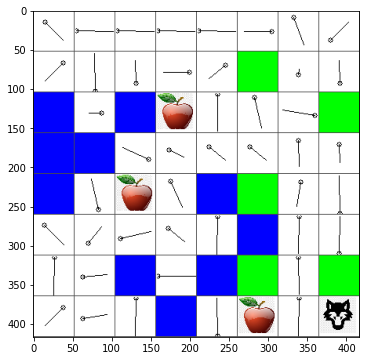

In [43]:
m.plot(Q)

## Tikrinti politiką

Kadangi Q-Lentelė nurodo kiekvieno veiksmo „patrauklumą“ kiekvienoje būsenoje, ją labai paprasta naudoti efektyviam navigavimui mūsų pasaulyje apibrėžti. Paprasčiausiu atveju galime tiesiog pasirinkti veiksmą, atitinkantį didžiausią Q-Lentelės reikšmę:


In [13]:
# code block 9

2

Jei kelis kartus išbandysite aukščiau pateiktą kodą, galite pastebėti, kad kartais jis tiesiog „užstringa“, ir jums reikia paspausti STOP mygtuką užrašų knygelėje, kad jį nutrauktumėte.

> **Užduotis 1:** Pakeiskite funkciją `walk`, kad apribotumėte maksimalų kelio ilgį tam tikru žingsnių skaičiumi (pvz., 100), ir stebėkite, kaip aukščiau pateiktas kodas kartais grąžina šią reikšmę.

> **Užduotis 2:** Pakeiskite funkciją `walk`, kad ji negrįžtų į vietas, kuriose jau buvo anksčiau. Tai užkirs kelią funkcijai `walk` kartotis, tačiau agentas vis tiek gali „įstrigti“ vietoje, iš kurios negali ištrūkti.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


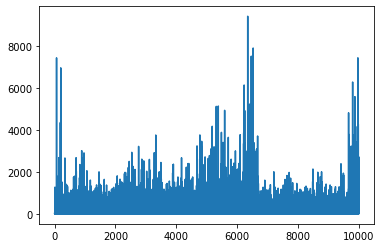

In [57]:
plt.plot(lpath)

## Pratimai
## Realistiškesnis pasaulis „Petras ir vilkas“



---

**Atsakomybės apribojimas**:  
Šis dokumentas buvo išverstas naudojant AI vertimo paslaugą [Co-op Translator](https://github.com/Azure/co-op-translator). Nors siekiame tikslumo, prašome atkreipti dėmesį, kad automatiniai vertimai gali turėti klaidų ar netikslumų. Originalus dokumentas jo gimtąja kalba turėtų būti laikomas autoritetingu šaltiniu. Kritinei informacijai rekomenduojama naudoti profesionalų žmogaus vertimą. Mes neprisiimame atsakomybės už nesusipratimus ar klaidingus interpretavimus, atsiradusius dėl šio vertimo naudojimo.
